# 11 - Determinant
- 11.1 Features of determinants
- 11.2 Determinant of a $2 \times 2$ matrix
- 11.3 The characteristic polynomial
- 11.4 $3 \times 3$ matrix determinant
- 11.5 The full procedure
- 11.6 $\Delta$ of triangles
- 11.7 Determinant and row reduction
- 11.8 $\Delta$ and scalar multiplication
- 11.9 Theory vs. practice
- 11.10 Exercises
- 11.11 Answers
- 11.12 Code challenges
- 11.13 Code solutions

In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

## 11.1 Features of determinants
- Determinant is defined only for square matrices
- Determinant is unique to the matrix
- Determinant of singular matrix is 0
- Determinant notation varies can be $\text{det}(A)$ or $\Delta$
- Determinant is unaffected by transpose eg $\text{det}(A) = \text{det}(A^T)$

## 11.2 Determinant of a $2 \times 2$ matrix
Formula for finding the determinant of a $2 \times 2$ matrix.
- Does not extend to higher dimensions.

$$
\text{det}\left(
\begin{bmatrix}
a & b \\
c & d \\
\end{bmatrix}\right) =
ad - bc
$$

### Example: Linearly Dependent Columns
Rank deficient matrices eg matrices with columns that are linearly dependent have a determinant of 0.

$$
\text{det}\left(
\begin{bmatrix}
a & \lambda a \\
c & \lambda c \\
\end{bmatrix}\right) =
a \lambda c - \lambda a c = 0
$$


## 11.3 The characteristic polynomial
The roots of the characteristic polynomial correspond to the eigenvalues of the matrix.

$$
\text{det}(A - \lambda I) = 0
$$

Example
$$
\begin{align}
\text{det}\left(
\begin{bmatrix}
1 & 3 \\
3 & 1 \\
\end{bmatrix} - \lambda I\right) &= 0 \\
\text{det}\left(
\begin{bmatrix}
1 - \lambda & 3 \\
3 & 1 - \lambda \\
\end{bmatrix} \right) &= 0 \\
(1 - \lambda)^2 - 9 &= 0 \\
\lambda^2 - 2 \lambda - 8 &= 0 \\
(\lambda - 4) (\lambda + 2) &= 0 \\
\lambda = +4, -2
\end{align}
$$

## 11.4 $3 \times 3$ matrix determinant
Formula for finding the determinant of a $3 \times 3$ matrix.
- Does not extend to higher dimensions.

$$
\text{det}\left(
\begin{bmatrix}
a & b & c \\
d & e & f \\
g & h & i \\
\end{bmatrix}\right) =
aei + bfg + cdh - ceg - bdi - afh
$$

### Rule of Sarrus
Rule of Sarrus is a mnemonic for computing the determinant of a $3 \times 3$ matrix by augmenting the matrix with the first and second columns of the original matrix and computing the determinant using the sum of the product of the diagonals minus the product of the off-diagonals.

<img src="images/200px-Schema_sarrus-regel.png">


Practice problem, checking (d).

In [2]:
A = np.array([[1,-2,3],[-4,5,-6],[7,-8,9]])

print(np.linalg.det(A))

0.0


## 11.5 The full procedure
_Not going to describe this, but finding the minors and cofactors of a matrix is useful for computing inverse._

## 11.6 $\Delta$ of triangles
Determinant of a triangular matrix is equal to the product of the diagonal elements.

$$
\text{det}(L) = \prod_{i=1}^n L_{i,i} \quad \text{det}(U) = \prod_{i=1}^n U_{i,i}
$$

## 11.7 Determinant and row reduction
Elementary row operations (ERO) have the following impact on the determinant.

1. Swap rows
    - Flip sign of the determinant
    - $\text{det}(A) = -\text{det}(A)$
2. Scale a row by a nonzero constant
    - Scales the determinant by the constant
    - $\text{det}(A) = \alpha \; \text{det}(A)$
3. Add to a row a scalar multiple of another row
    - Has no effect on the determinant
    - $\text{det}(A) = \text{det}(A)$

In [3]:
def swap_rows(A, i1, i2):
    """
    swap_rows swaps row i1 and i2 from A

    :param A: numpy.ndarray  Matrix A
    :return: numpy.ndarray   Matrix A
    """
    A[[i1,i2]] = A[[i2,i1]]  # Numpy row swap notation.
    return A


# Verify that swapping rows flips the sign of the determinant.
I = np.eye(3)
detI = np.linalg.det(I)
swap_rows(I, 1, 0)
detIswap = np.linalg.det(I)
np.testing.assert_equal(detI, -detIswap)

# Verify that scaling a row by a nonzero constant scales the determinant.
I = np.eye(3)
detI = np.linalg.det(I)
k = 2.5
I[1,:] = k*I[1,:]
detkI = np.linalg.det(I)
np.testing.assert_equal(k*detI, detkI)

# Verify that adding a scalar multiple of another row to a row has no effect on determinant.
I = np.eye(3)
detI = np.linalg.det(I)
k = 2.5
I[1,:] += k*I[0,:]
detkplus0I = np.linalg.det(I)
np.testing.assert_equal(detI, detkplus0I)

## 11.8 $\Delta$ and scalar multiplication
Multiplying a matrix by a scalar, scales the determinant by the dimension of the matrix
- Determinant is defined only for square matrices, so dimension is equal to the number of rows or columns

$$
\text{det}(\alpha A) = \alpha^{n} \; \text{det}(A)
$$

Notes
- Proof based on extending the behavior for scaling a row for all rows in the matrix

In [4]:
# Verify that scaling the matrix by a nonzero constant scales the determinant by constant raised to power.
I = np.eye(3)
detI = np.linalg.det(I)
k = 2.5
detkI = np.linalg.det(k*I)
np.testing.assert_almost_equal(detkI, k**3)

## 11.9 Theory vs. practice

### Why is the determinant important?
1. Eigenvalues
- Roots of the characteristic polynomial correspond to the eigenvalues of the matrix.
2. Inverse
- The cofactors and minors of a matrix (derived from determinant) can be used to find the inverse of the matrix.

### Practice
Although the determinant is a useful mathematical construct, the cost of computing the determinant means that it is not a useful computational technique.

## 11.12 Code challenges

> 1. Write code that illustrates $\text{det}(\alpha A) = \alpha^{n} \; \text{det}(A)$. Generate a $4 \times 4$ matrix of integers between 0 and 10, then generate a random integer $\beta$ between -10 and -1, and then compare the left and right hand side of the equation.

In [5]:
n = 4
A = np.random.randint(0, 10+1, size=n*n).reshape(n, n)
beta = np.random.randint(-10, -1+1)

detlhs = np.linalg.det(beta * A)
detrhs = beta**n * np.linalg.det(A)

np.testing.assert_almost_equal(detlhs, detrhs)

> 2. Demonstrate the numerical instability of the determinant by computing the determinant for matrices of increasingly larger sizes.  Find the determinant of rank deficient matrices of increasing size from $3 \times 3$ to $30 \times 30$.  Repeat the experiement 100 times for each size of matrix and compute the mean of the absolute value of the determinant.  Plot the results.

Answer: The determinant of a rank deficient matrix is always 0. Observe that in the plot below the determinant exponentially increases from 0 as the size of the matrix increases. This demonstrates the instability of the determinant for large size matrices.

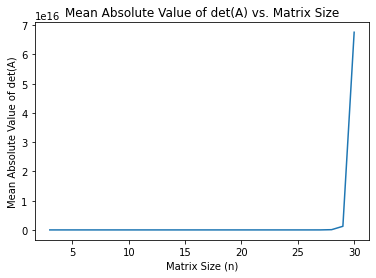

In [6]:
def rank(n, r):
    """
    rank returns a square matrix of normally distributed random values and rank r 

    :param n: int            Size of a single dimension of the returned matrix.
    :param r: int            Rank.
    :return: numpy.ndarray   Matrix with dimensions n \times n and rank r.
    """
    A = np.random.normal(size=n*r).reshape(n, r)
    B = np.random.normal(size=r*n).reshape(r, n)
    return A @ B


sizes = np.arange(3, 30+1,1)
ranks = sizes - 1
mu = np.zeros(sizes.size)
nrepeat = 100
for i, (size, r) in enumerate(zip(sizes, ranks)):
    dets = np.zeros(nrepeat)
    for j in range(nrepeat):
        A = rank(size, r)
        dets[j] = np.abs(np.linalg.det(A))  # Absolute value of determinant.
    mu[i] = np.mean(dets)

plt.plot(sizes, mu)
plt.title('Mean Absolute Value of det(A) vs. Matrix Size')
plt.ylabel('Mean Absolute Value of det(A)')
plt.xlabel('Matrix Size (n)')
plt.show()